In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [2]:
df = pd.read_csv('Consolidated_results_all_models.csv')

In [3]:
df.head()

,Date,Prediction,real_values,metrics,station,model_name
0,2020-05-10 06:00:00,[13.623125 13.77864 13.842224 13.786391 14.00...,[13 13 13 13 13 13],0.892279,10001,LSTM_A
1,2020-05-10 06:15:00,[13.623125 13.77864 13.842224 13.786391 14.00...,[13 13 13 13 13 13],0.892279,10001,LSTM_A
2,2020-05-10 06:30:00,[13.623125 13.77864 13.842224 13.786391 14.00...,[13 13 13 13 13 13],0.892279,10001,LSTM_A
3,2020-05-10 06:45:00,[13.623125 13.77864 13.842224 13.786391 14.00...,[13 13 13 13 13 13],0.892279,10001,LSTM_A
4,2020-05-10 07:00:00,[13.623125 13.77864 13.842224 13.786391 14.00...,[13 13 13 13 13 13],0.892279,10001,LSTM_A


In [4]:
df.groupby('model_name').metrics.mean()

model_name
Fb_Prophet    2.294617
LSTM_A        0.763850
LSTM_B        0.769382
Name: metrics, dtype: float64

In [5]:
print(df.groupby('Date').metrics.mean())

Date
2020-05-10 06:00:00    1.069780
2020-05-10 06:15:00    1.064940
2020-05-10 06:30:00    1.054610
2020-05-10 06:45:00    1.049380
2020-05-10 07:00:00    1.038113
2020-05-10 07:15:00    1.030659
2020-05-10 07:30:00    1.024404
2020-05-10 07:45:00    1.036457
2020-05-10 08:00:00    1.048138
2020-05-10 08:15:00    1.070603
2020-05-10 08:30:00    1.082077
2020-05-10 08:45:00    1.090812
2020-05-10 09:00:00    1.107077
2020-05-10 09:15:00    1.123921
2020-05-10 09:30:00    1.140234
2020-05-10 09:45:00    1.153206
2020-05-10 10:00:00    1.170560
2020-05-10 10:15:00    1.182666
2020-05-10 10:30:00    1.201787
2020-05-10 10:45:00    1.222947
2020-05-10 11:00:00    1.247283
2020-05-10 11:15:00    1.238614
2020-05-10 11:30:00    1.233817
2020-05-10 11:45:00    1.259904
2020-05-10 12:00:00    1.275655
2020-05-10 12:15:00    1.263799
2020-05-10 12:30:00    1.259567
2020-05-10 12:45:00    1.258013
2020-05-10 13:00:00    1.246644
2020-05-10 13:15:00    1.232698
2020-05-10 13:30:00    1.234902
202

In [6]:
print(df.groupby('station').metrics.mean())

station
1001     0.840860
1002     2.203619
1003     0.845143
1006     1.111885
1007     1.051003
           ...   
48010    0.215455
48012    0.327268
51001    0.913410
51002    0.589499
51003    0.316301
Name: metrics, Length: 1300, dtype: float64


In [40]:
pd.pivot_table(df, values='metrics' ,index='station',  aggfunc='max').sort_values(by='metrics', ascending=False).iloc[:20,:]

,metrics
station,
22303,1.490423
12026,1.059009
4108,0.868761
19115,0.805442
19009,0.754280
17022,0.672651
21212,0.618008
18035,0.535718
4016,0.532560


In [39]:
pd.pivot_table(df, values='metrics', columns='model_name', index='station',  aggfunc='max')

model_name,Fb_Prophet,LSTM_A,LSTM_B
station,,,
1001,4.118801,2.067353,1.460104
1002,14.354415,6.461024,6.361458
1003,4.384077,1.024002,1.008917
1006,4.703720,1.825309,1.872394
1007,4.120636,1.356876,3.455719
...,...,...,...
48010,1.078760,0.699822,0.771576
48012,2.463156,0.604847,0.597761
51001,5.096110,0.681836,1.864883


In [208]:
df_by_station = pd.pivot_table(df, values='metrics', columns='model_name', index='station',  aggfunc='max').sort_values(by='LSTM_B', ascending = False)
df_by_station.head(30)

model_name,Fb_Prophet,LSTM_A,LSTM_B
station,,,
19001,9.364989,20.210995,16.790261
19124,17.537338,6.914317,16.090253
19033,21.007203,14.759066,13.617138
14008,6.709875,10.857406,11.757335
13125,3.186660,8.948263,10.998659
13043,5.494988,7.439280,10.702485
33104,15.061605,12.332395,10.288051
12038,8.252961,6.251108,10.216916
11031,5.190398,10.351863,10.014723


In [89]:
df_by_station["best_model"] = "" 
df_by_station["best_metrics"] = "" 
for i in df_by_station.index:
    if min(df_by_station.loc[i][:3]) == df_by_station["Fb_Prophet"].loc[i]:
        df_by_station["best_model"].loc[i] = "Fb_Prophet"
        df_by_station["best_metrics"].loc[i] = df_by_station["Fb_Prophet"].loc[i]
    elif min(df_by_station.loc[i][:3]) == df_by_station["LSTM_A"].loc[i]:
        df_by_station["best_model"].loc[i] = "LSTM_A"
        df_by_station["best_metrics"].loc[i] = df_by_station["LSTM_A"].loc[i]
    else:
        df_by_station["best_model"].loc[i] = "LSTM_B"
        df_by_station["best_metrics"].loc[i] = df_by_station["LSTM_B"].loc[i]

/home/exalis/anaconda3/envs/tensorflowenv/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [90]:
df_by_station.head()

model_name,Fb_Prophet,LSTM_A,LSTM_B,best_model,best_metrics
station,,,,,
32018,22.895621,3.416523,2.363501,LSTM_B,2.3635
5026,22.192535,7.264653,5.318502,LSTM_B,5.3185
19033,21.007203,14.759066,13.617138,LSTM_B,13.6171
44002,20.997394,3.935458,3.806130,LSTM_B,3.80613
15104,20.569338,3.277925,3.053583,LSTM_B,3.05358


In [91]:
summary_table = pd.pivot_table(df_by_station, values='best_metrics', index='best_model',  aggfunc='count')

In [118]:
summary_table["%"] = ""
for i in summary_table.index:
    print(i)
    summary_table["%"][i] = summary_table.best_metrics[i] / summary_table.best_metrics.sum()

Fb_Prophet
LSTM_A
LSTM_B


/home/exalis/anaconda3/envs/tensorflowenv/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [120]:
summary_table

model_name,best_metrics,%
best_model,,
Fb_Prophet,97,0.0746154
LSTM_A,652,0.501538
LSTM_B,551,0.423846


In [155]:
def result_visualization(df, station, time):
    temp_df = df[df['station'] == station]
    temp_df = temp_df[temp_df['Date'] == time]
    return temp_df

In [159]:
temp_df = result_visualization(df, 10001, '2020-05-10 09:45:00')

In [162]:
lstm_A = temp_df[temp_df['model_name'] == 'LSTM_A']

In [163]:
lstm_A

,Date,Prediction,real_values,metrics,station,model_name
15,2020-05-10 09:45:00,[14.196996 14.325897 14.260663 14.337485 14.48...,[14 14 14 14 14 14],0.362274,10001,LSTM_A


In [178]:
lstm_A['Prediction']

15    [14.196996 14.325897 14.260663 14.337485 14.48...
Name: Prediction, dtype: object

DataError: No numeric types to aggregate

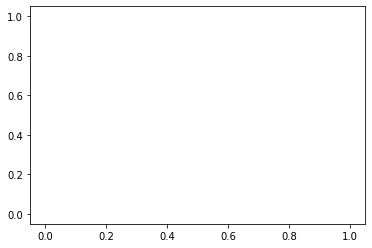

In [185]:
_ = sns.lineplot(x='real_values', y='Prediction', data=lstm_A)

In [170]:
range(5)

range(0, 5)

In [158]:
import seaborn as sns

In [ ]:
_ = seaborn.lineplot(data)

In [187]:
df_by_station.Fb_Prophet

station
32018    22.895621
5026     22.192535
19033    21.007203
44002    20.997394
15104    20.569338
           ...    
17123     0.000000
44001     0.000000
2111      0.000000
44009     0.000000
12165     0.000000
Name: Fb_Prophet, Length: 1300, dtype: float64

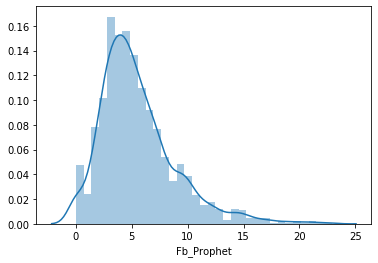

In [189]:
f=

In [194]:
import matplotlib.pyplot as plt

<function matplotlib.pyplot.show(*args, **kw)>

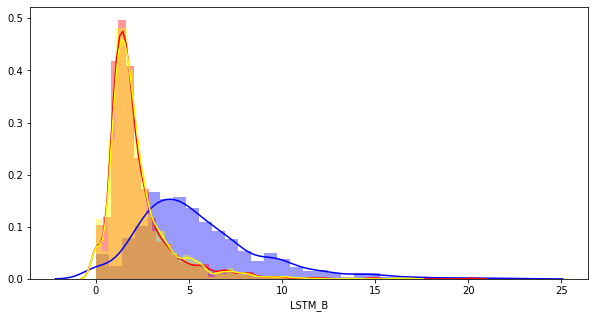

In [205]:
f, ax = plt.subplots(figsize=(10,5))

_ = sns.distplot(df_by_station.Fb_Prophet, color='blue')
_ = sns.distplot(df_by_station.LSTM_A, color='red')
_ = sns.distplot(df_by_station.LSTM_B, color='yellow')

plt.show

<function matplotlib.pyplot.show(*args, **kw)>

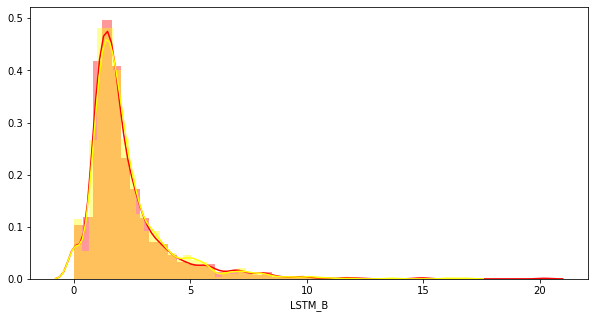

In [206]:
f, ax = plt.subplots(figsize=(10,5))

_ = sns.distplot(df_by_station.LSTM_A, color='red')
_ = sns.distplot(df_by_station.LSTM_B, color='yellow')

plt.show

Model LSTM_A is the best!!

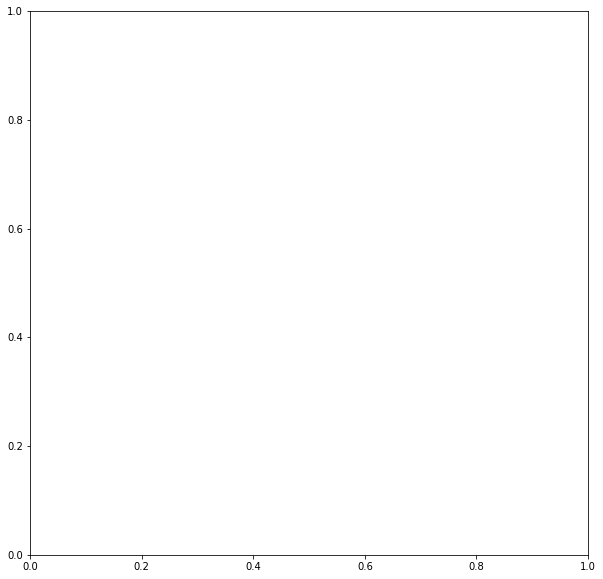

In [202]:
fig, ax = plt.subplots(figsize=(10,10))
sns.distplot(df['age'],ax=ax,axlabel='all',hist=False)
sns.distplot(df[df['class']=='1']['age'],ax=ax,axlabel='fraud',color='red',hist=False)
sns.distplot(df[df['class']=='0']['age'],ax=ax,axlabel='fraud',color='green',hist=False)
plt.show()

Inclure les deux modèles et tracer une zone entre les deux?